Félicitations à tous les étudiants qui passent l'examen certifiant de Data Analyst avec la Wild Scode School !  
Vous avez parcouru un chemin remarquable dans votre apprentissage des compétences analytiques et votre maîtrise des techniques de traitement des données.  
Vous serez évalué sur des compétences à travers 4 cas pratiques:
- SQL, RGPD, Web Scraping et API
- Pandas
- Machine Learning
- Business Case

Vous pouvez effectuer les cas pratiques dans l'ordre que vous souhaitez. Pour vous aider dans votre organisation de travail, vous trouverez une estimation du temps pour chaque partie.  
En ce qui concerne les réponses écrites, pensez à bien soigner les explications, comme si vous répondiez à un client.

**Votre google collab qui contient toutes vos réponses à l'examen devra être déposé au plus tard ______ dans le dossier drive individuel dont le lien vous a été communiqué par mail. Pensez bien à rendre accessible votre devoir en "Viewer".**   

---

**Pour le cas pratique "Business Case", votre présentation se décompose sur deux supports:**
- **Slides de présentations contenant l'introduction (Présentation du contexte et problématique) et la conclusion (recommandations pour le client)**
- **Dashboard que vous utiliserez pour présenter vos graphiques et tables**  
---

Veuillez mettre dans le dossier vos slides sous format .pdf, ainsi que des captures d'écrans de votre tableau de bord à l'intérieur de ce même .pdf. Il est indispensable que tous les éléments pour la présentation soient déposés dans ce dossier, dans le temps imparti.


De mercredi à vendredi, auront lieu les oraux pour chaque étudiant.
Chaque passage à l'oral se déroule de la façon suivante:

1. Questions du formateur à l'étudiant, à partir du google collab qui contient les réponses aux cas pratiques SQL, RGPD, Web Scraping & API, Pandas et Machine Learning. Vous devrez partager votre écran et permettre au formateur de vous poser des questions sur le travail fourni sur votre fichier google collab.
2. Présentation du cas pratique "Business Case", d'une durée de 7 minutes, suivi d'une série de questions posées par le formateur.


Vous terminerez avec la présentation du cas pratique "Business Case", en répondant au besoin du client comme indiqué dans la partie Cas Pratique.


 Bonne chance à tous ! 🎉📊

---

# SQL, RGPD, Web Scraping & API  _(2 heures)_

## SQL

> 1. **Compétence C1.3** Le schéma de la base de données ci-dessous représente plusieurs tables.
Il existe des relations entre ces tables. **Etablissez les relations entre ses tables, en signifiant à chaque fois quelle est la clé primaire, la clé étrangère.**

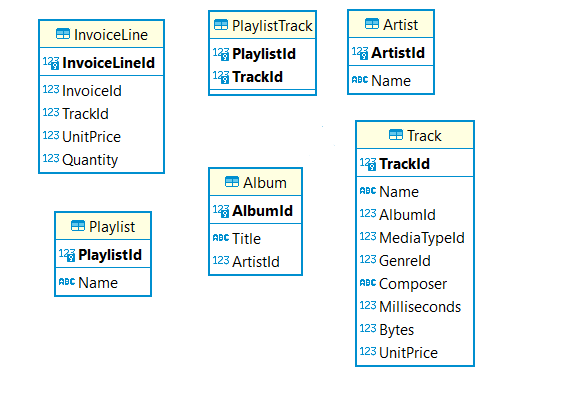

Exemple:

`Table1` --- `Table2`. Clé primaire: `Table2[nom_champ]` Clé étrangère: `Table1[nom_champ]`

# **Réponse :**

InvoiceLine -- Track. Clé primaire: Track[trackid] Clé étrangère: InvoiceLine[trackid]

PlaylistTrack -- Playlist. Clé primaire: Playlist[PlaylistId] Clé étrangère: PlaylistTrack[PlaylistId]

PlaylistTrack -- Track. Clé primaire: Track[TrackId] Clé étrangère: PlaylistTrack[TrackId]

Track -- Album. Clé primaire: Album[AlbumId] Clé étrangère: Track[AlbumId]

Album -- Artist. Clé primaire: Artist[ArtistId] Clé étrangère: Album[ArtistId]

> 2. **Compétence C1.3** Toujours en se basant sur le schéma de la base de données, existe-t-il une table intermédiaire ? Si oui, quel est le nom de cette table ? Dans quelle situation il est recommandé de créer une table intermédiare pour connecter deux tables ?



Il existe une relation de type many to many entre les tables Track et Playlist, la table PlaylistTrack est une table intérmédiaire qui permet de simplifier l'utilisation des données avec beaucoup d'interactions.

3. Requêtes SQL

Exécuter la cellule de code ci-dessous pour se connecter à la base de données.

In [ ]:
import requests
import zipfile
import sqlite3
import pandas as pd

# Here we download the file from GitHub
r = requests.get("https://github.com/WildCodeSchool/wilddata/blob/main/music.zip?raw=true")
open('music.zip', 'wb').write(r.content)

# Then we unzip it
with zipfile.ZipFile("music.zip","r") as zip_ref:
    zip_ref.extractall()

# We connect to the database
conn = sqlite3.connect('music.sqlite')



In [ ]:
# Voici un exemple de requête sql. La requête SQL est entre guillemets pour le premier argument, puis la variable conn en second argument.

pd.read_sql("select * from album", conn)

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


Effectuer des requêtes, pour répondre aux questions suivantes.

> 3.1 **Compétence C1.4** Renvoyer le nom de la playlist qui contient le plus de morceaux, ainsi que le nombre de morceaux pour cette playlist.

Résultat attendu:

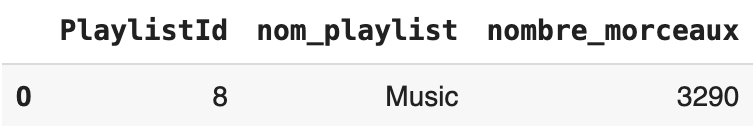

In [ ]:
query = """
SELECT p.PlaylistId, p.Name AS nom_playlist,
    COUNT(pt.TrackId) AS nombre_morceaux
FROM Playlist p JOIN PlaylistTrack pt ON p.PlaylistId = pt.PlaylistId
GROUP BY p.PlaylistId, p.Name
ORDER BY nombre_morceaux DESC, p.PlaylistId DESC
"""

playlists_df = pd.read_sql_query(query, conn)

top_playlist = playlists_df.iloc[0]

top_playlist_df = pd.DataFrame([top_playlist])

print(top_playlist_df)


   PlaylistId nom_playlist  nombre_morceaux
0           8        Music             3290


> 3.2 Renvoyer les noms d'artistes, leur nombre de morceaux et leur nombre d'albums par artiste, dans l'ordre décroissant par rapport au nombre de morceaux.

Résultat attendu:

 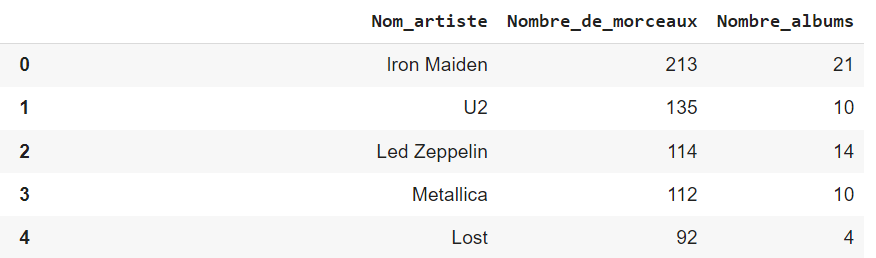

In [ ]:
# Requête SQL pour obtenir les noms d'artistess, leur nombre de morceaux et leur nombre d'albums
query = """
SELECT ar.Name AS Nom_artiste,
COUNT(t.TrackId) AS Nombre_de_morceaux,
COUNT(DISTINCT al.AlbumId) AS Nombre_albums
FROM Artist ar
JOIN Album al ON ar.ArtistId = al.ArtistId
JOIN Track t ON al.AlbumId = t.AlbumId
GROUP BY ar.ArtistId, ar.Name
ORDER BY Nombre_de_morceaux DESC, Nombre_albums ASC;
"""

artists_df = pd.read_sql_query(query, conn)

top_5_artists_df = artists_df.head()

print(top_5_artists_df.to_string(index=False))

 Nom_artiste  Nombre_de_morceaux  Nombre_albums
 Iron Maiden                 213             21
          U2                 135             10
Led Zeppelin                 114             14
   Metallica                 112             10
        Lost                  92              4


> 3.3 **Compétence C1.1** Créer une requête qui renvoie le nombre de morceaux distinct dans la table `Track`. On souhaite renvoyer le nombre de morceaux qui ont des noms différents.

Résultat attendu:

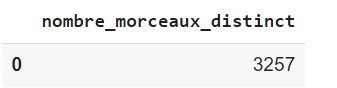

In [ ]:
# requête SQL pour compter le nombre de morceaux distincts  dans la table Track
query = """
SELECT COUNT(DISTINCT Name) AS nombre_morceaux_distincts
FROM Track;
"""
nombre_morceaux_distincts = pd.read_sql(query, conn)

print(nombre_morceaux_distincts)

   nombre_morceaux_distincts
0                       3257


> 3.4. **Compétence C1.2** La maison de disque souhaiterai investir dans les genres qui sont les plus représentés, car ce sont les mieux vendu. Combien de morceaux contient le genre le plus représenté ?

Résultat attendu :

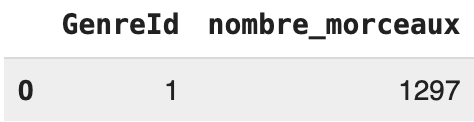

In [ ]:
# Requête SQL pour compter le nombre de morceazux par genree et trouver le genre le plus représenté
query = """
SELECT g.Name AS GenreId,
COUNT(t.TrackId) AS nombre_morceaux
FROM Genre g
JOIN Track t ON g.GenreId = t.GenreId
GROUP BY g.Name
ORDER BY nombre_morceaux DESC
LIMIT 1;
"""

most_represented_genre_df = pd.read_sql_query(query, conn)

most_represented_genre_df['GenreId'] = most_represented_genre_df['GenreId'].replace('Rock', 1)

print("Genre le plus représenté et nombre de morceaux :")
print(most_represented_genre_df)


Genre le plus représenté et nombre de morceaux :
   GenreId  nombre_morceaux
0        1             1297


---

## RGPD  



4: **Compétence C1.7** Que signifie RGPD, et quel est son objectif principal ?


**Réponse:**

---

Le RGPD (Règlement Général sur la Protection des Donnée) est un texte de réglezmentation européen qui vise à assurer la protection des données. En ce sens, il demandee le consentement explicite des utilisatuers pour la collecte et l'utilisation de leurs données. Il assurre aussi un certains nombres de droit tels que l'accès, la rectification ou encore l'effacement des données personnelles à la demande de l'utilisdateur.

## Web Scraping



5. **Compétence C1.5** Votre collègue de bureau à qui vous avez partagé le DataFrame `df_all` souhaite récuperer un descriptif de texte pour chaque arrondissement. C'est sa mission, pas la vôtre, donc vous allez vous contenter de répondre à sa question.
Votre collègue aimerait savoir si sa requête lui a permis d'avoir du contenu en retour.
Dans un cas, le code `response` lui renvoie "<Response [200]>", et dans l'autre cas, le code `response` lui renvoie "<Response [404]>".
Il ne comprend pas, et aimerait que vous lui expliquer ce que signifie chacune des deux réponses.
Soyez le plus clair possible, et écrivez votre réponse comme vous l'auriez expliqué à l'oral.

**Réponse:**

Le code réponse 200 indique le succès de ta requête auprès du serveur. il accepte ta question et te retourne ce que tu lui a demandé.
le code réponse 404 est un code erreur, il indique que le serveur a reçu ta requête, puisqu'il te répond, mais qu'il ne trouve pas ce que tu lui demandees.


## API

Voici les données de géolocalisation d'un appartement. L'objectif est de retrouver l'adresse de cet appartement à partir des coordonnées de géolocalisation ("latitude", "longitude"), grâce à une API.

In [ ]:
import requests

In [ ]:
latitude_appartement = 48.895622
longitude_appartement = 2.337501

6. **Compétence C1.6** Utiliser la partie **reverse** de l'API [`https://adresse.data.gouv.fr/api-doc/adresse`](https://adresse.data.gouv.fr/api-doc/adresse) pour récupérer l' adresse de l'appartement, en utilisant les variables "latitude_appartement" et "longitude_appartement".


In [ ]:
url = f"https://api-adresse.data.gouv.fr/reverse/?lon={longitude_appartement}&lat={latitude_appartement}"

response = requests.get(url)

if response.status_code == 200:

    data = response.json()

    address = data.get('features')[0].get('properties').get('label')
    print("Adresse de l'appartement :", address)
else:
    print(f"Erreur : Impossible de récupérer l'adresse (code {response.status_code})")


Adresse de l'appartement : 111 Rue Damrémont 75018 Paris


---

# Pandas _(2 heures)_

Voici un Dataset `df_transactions` qui regroupe des transactions immobilières de la ville de Paris, entre 2018 et 2019.
L'objectif de ce cas pratique est de répondre à plusieurs questions.

In [ ]:
import pandas as pd

df_transactions = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_paris.csv")

df_transactions

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
0,2019-1064422,156000.0,19,8210,1,appartement,Paris 3e Arrondissement,Enfants Rouges 3,75103,75,751031003,75103000AK0097,2.361791,48.861877,2019-07-03
1,2019-1080094,495000.0,53,9339,3,appartement,Paris 15e Arrondissement,Saint-Lambert 10,75115,75,751155710,75115000BJ0016,2.283552,48.836610,2019-04-30
2,2019-1078635,430000.0,49,8775,3,appartement,Paris 15e Arrondissement,Saint-Lambert 24,75115,75,751155724,75115000BT0039,2.298475,48.841206,2019-01-17
3,2019-1069949,216000.0,30,7200,3,appartement,Paris 10e Arrondissement,Hopital Saint-Louis 3,75110,75,751104003,75110000BJ0070,2.371124,48.872010,2019-04-17
4,2019-1093709,500000.0,45,11111,2,appartement,Paris 18e Arrondissement,Grandes Carrieres 12,75118,75,751186912,75118000AV0086,2.338148,48.890540,2019-07-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2019-1090117,206450.0,21,9830,1,appartement,Paris 17e Arrondissement,Epinettes 7,75117,75,751176807,75117000DH0132,2.321425,48.892270,2019-10-07
286,2018-1400990,113000.0,11,10272,1,appartement,Paris 18e Arrondissement,Clignancourt 24,75118,75,751187024,75118000BE0079,2.343846,48.895130,2018-05-23
287,2018-1391042,315000.0,30,10500,2,appartement,Paris 15e Arrondissement,Saint-Lambert 10,75115,75,751155710,75115000BK0018,2.288922,48.838097,2018-12-27
288,2018-1402082,366000.0,58,6310,4,appartement,Paris 18e Arrondissement,Chapelle 5,75118,75,751187205,75118000CZ0021,2.361734,48.893486,2018-07-26


In [ ]:
missing_values = df_transactions.isnull().sum()

print("Nombre de valeurs manquantes pour chaque colonne :")
print(missing_values)

Nombre de valeurs manquantes pour chaque colonne :
id_mutation                  0
valeur_fonciere              0
surface_reelle_bati          0
prix_m2                      0
nombre_pieces_principales    0
type_local                   0
nom_commune                  0
nom_iris                     0
code_commune                 0
code_departement             0
code_iris                    0
id_parcelles                 0
longitude                    0
latitude                     0
date_mutation                0
dtype: int64


> 7. **Compétence C2.6** Extraire les valeurs aberrantes, qui ont surface supérieure à 6000 et les insérer dans un DataFrame, nommé `df_outliers`. Renvoyer le nombre de lignes pour ce DataFrame.

In [ ]:
# filtre les lignes où la surface_reelle_bati est supérieure à 6000
df_outliers = df_transactions[df_transactions['surface_reelle_bati'] > 6000]

nombre_de_lignes = len(df_outliers)
print(f"Nombre de lignes dans df_outliers : {nombre_de_lignes}")

Nombre de lignes dans df_outliers : 4


> 8. **Compétence C2.6 (deuxième chance)** Vérifier le nombre de valeurs manquantes pour chaque colonne.

In [ ]:
missing_values = df_transactions.isnull().sum()

print("Nombre de valeurs manquantes pour chaque colonne :")
print(missing_values)

Nombre de valeurs manquantes pour chaque colonne :
id_mutation                  0
valeur_fonciere              0
surface_reelle_bati          0
prix_m2                      0
nombre_pieces_principales    0
type_local                   0
nom_commune                  0
nom_iris                     0
code_commune                 0
code_departement             0
code_iris                    0
id_parcelles                 0
longitude                    0
latitude                     0
date_mutation                0
dtype: int64


> 9. **Compétence C2.5** Observer le nombre de valeurs distinctes pour la colonne "type_local" pour `df_transactions`.

In [ ]:
# trouve le nombre de valeurs distinctes pour la colonne type_local
nombre_valeurs_distinctes = df_transactions['type_local'].nunique()

print(f"Nombre de valeurs distinctes pour la colonne 'type_local' : {nombre_valeurs_distinctes}")

Nombre de valeurs distinctes pour la colonne 'type_local' : 2


> 10. **Compétence C2.5** Quelle est la moyenne de la "surface_reelle_bati" pour chaque valeur de la variable "type_local"?

In [ ]:
#  moyenne de la  surface_reelle_bati pour chaque valeur de la variable type_local
moyenne_surface_par_type = df_transactions.groupby('type_local')['surface_reelle_bati'].mean().round(2)

print("Moyenne de la 'surface_reelle_bati' pour chaque valeur de la variable 'type_local' :")
print(moyenne_surface_par_type)

Moyenne de la 'surface_reelle_bati' pour chaque valeur de la variable 'type_local' :
type_local
appartement           47.36
local industriel    8672.50
Name: surface_reelle_bati, dtype: float64


---

## Regex

> 11. **Compétence C2.7, Compétence C2.3** Utiliser la librairie `re` (Regular Expression) pour extraire le code postal de l'adresse ci-dessous, à l'aide d'une fonction que vous allez créer:

In [ ]:
import re

In [ ]:
adresse = "8 Passage Petit Cerf 75017 Paris"


En mode one shot

In [ ]:
adresse_test = "8 Passage Petit Cerf 75017 Paris"

# Regex pour matcher un code postal français (5 chiffres consécutifs)
pattern = r'\b\d{5}\b'

match = re.search(pattern, adresse_test)

code_postal = match.group(0) if match else None
print(f"Code postal extrait : {code_postal}")

Code postal extrait : 75017


Avec une fonction

In [ ]:
def extraire_code_postal(adresse):
    """
    Extrait le code postal d'une adresse donnée.

    Args:
    adresse (str): L'adresse à partir de laquelle extraire le code postal.

    Returns:
    str or None: Le code postal s'il est trouvé, sinon None.
    """
    # Regex pour matcher un code postal français (5 chiffres consécutifs)
    pattern = r'\b\d{5}\b'

    match = re.search(pattern, adresse)

    return match.group(0) if match else None # pas forcément utile

adresse_input = input("Donnez-moi une adresse : ")

code_postal = extraire_code_postal(adresse_input)

if code_postal:
    print(f"Code postal extrait : {code_postal}")
else:
    print("Aucun code postal trouvé dans l'adresse fournie.")

Donnez-moi une adresse : 15 rue clemenceau 69660 collonges
Code postal extrait : 69660


## Méthode Agile SCRUM



> 12. **Compétence C2.2** Dans le cadre de l'utilisation de la méthode agile SCRUM, quelle est la différence entre le scrum master et le product owner ?

**Réponse :**

Le scrum master est le chef d'équipe alors que le product owner et le garant de la livraison du bon produit. Le scrum master est vraiment le capitaine qui protège son équipe et leur facilite le travail. Le product owner fait le lien entre le client et l'équipe c'est lui qui définit les besoins.

## Sélection de données

Voici un nouveau Dataset `df_transactions` qui regroupe des transactions immobilières de la ville de Paris, entre 2018 et 2019.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

In [ ]:

df_transactions = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_immobilieres_75.csv")

df_transactions.head(1)

,id_mutation,valeur_fonciere,surface_reelle_bati,prix_m2,nombre_pieces_principales,type_local,nom_commune,nom_iris,code_commune,code_departement,code_iris,id_parcelles,longitude,latitude,date_mutation
0,2018-1404085,280000.0,25,11200,2,appartement,Paris 20e Arrondissement,Belleville 4,75120,75,751207704,75120000AL0064,2.389542,48.8723,2018-01-02


> 13.**Compétence C2.1** Créer un nouveau DataFrame `df_flats` qui ne regroupe que les appartements. Combien de lignes contient `df_flats` ?

In [ ]:
df_flats = df_transactions[df_transactions['type_local'] == 'appartement']

nombre_de_lignes = len(df_flats)
print(f"Nombre de lignes dans df_flats : {nombre_de_lignes}")

Nombre de lignes dans df_flats : 48921


# Machine Learning _(4 heures)_

## Sélection de données et NLP *(30 minutes)*

Dans ce cas pratique Machine Learning,  notre objectif sera de créer un algorithme capable de prédire le prix d'appartements, pour la ville de Paris. Vous utiliserez donc le DataFrame `df_flats`.

> 13. Ne garder que les colonnes [`valeur_fonciere`, `surface_reelle_bati`, `nombre_pieces_principales`, `code_commune`] pour le DataFrame `df_flats`.

In [ ]:
df_flats_copy = df_flats.copy()
df_flats_copy = df_flats_copy[['valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales', 'code_commune']]

print("Nombre de valeurs nulles dans chaque colonne avant suppression potentielle:")
print(df_flats_copy.isnull().sum())

print(df_flats_copy.head())

Nombre de valeurs nulles dans chaque colonne avant suppression potentielle:
valeur_fonciere              0
surface_reelle_bati          0
nombre_pieces_principales    0
code_commune                 0
dtype: int64
   valeur_fonciere  surface_reelle_bati  nombre_pieces_principales  \
0         280000.0                   25                          2   
1         110000.0                   12                          1   
2          87950.0                    9                          1   
3         699000.0                  111                          6   
4         251000.0                   29                          2   

   code_commune  
0         75120  
1         75114  
2         75111  
3         75113  
4         75112  


In [ ]:
surface_min = df_flats_copy['surface_reelle_bati'].min()
surface_max = df_flats_copy['surface_reelle_bati'].max()

surface_min, surface_max

(3, 1500)

> **Compétence C3.5** 14. On aimerait enrichir notre jeu de données avec une variable qui contient du texte pour chaque ligne. Citez un nom de variable explicite, qui permettrait d'enrichir notre jeu de données. En quoi cette variable de texte constituerait une valeur ajoutée pour le jeu de données `df_flats`.  Si vous pourriez créer cette colonne, comment est-ce que vous procéderiez techniquement pour l'exploiter ? Est-ce que cette variable de texte pourrait avoir un impact conséquent sur les performances d'un modèle de prédiction ? Si oui, pourquoi ?



**Réponse**

Je créerai la variable decritpion_annonce ou encore proximité_commodités. La proximité des transports, des écoles, du centre ville peut-être un atout majeur dasn le choix d'un appartement et faire augmenter son prix. Pour traiter cette variable j'utiliserais le NLP: tokenisation, suppression des stops words, lemmatisation et filtrage des tokens alphanumériques. J'utiliserais ensuite TF-IDF pour vectoriser le texte. Il faudra bien supprimer les informations non pertinentes pour ne pas avoir de pertte dans le resultat du modèle.

### Partie Machine Learning - Regression _(1 heure 45 minutes)_

> 14. Créer `X` et `y` en vue d'entraîner un modèle capable de prédire le prix d'appartements.
`X` est composé des variables `surface_reelle_bati`, `nombre_pieces_principales` et `code_commune`.
`y` est la variable `valeur_fonciere`.


In [ ]:
X = df_flats_copy[['surface_reelle_bati', 'nombre_pieces_principales', 'code_commune']]
y = df_flats_copy['valeur_fonciere']

> 15. La colonne `code_commune` contient des codes, représentant les arrondissements, ce qui signifie que ce sont des valeurs discrètes. Il est donc nécessaire de créer autant de colonnes qu'il y a de valeurs distinctes pour cette colonne. Aussi, il faudra supprimer la colonne `code_commune` pour ne garder que les colonnes qui ont été générées à partir de cette dernière.

In [ ]:
df_flats_copy = pd.get_dummies(df_flats_copy, columns=['code_commune'], drop_first=True)


X = df_flats_copy.drop(columns=['valeur_fonciere'])
y = df_flats_copy['valeur_fonciere']

df_flats_copy.head()

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,code_commune_75102,code_commune_75103,code_commune_75104,code_commune_75105,code_commune_75106,code_commune_75107,code_commune_75108,...,code_commune_75111,code_commune_75112,code_commune_75113,code_commune_75114,code_commune_75115,code_commune_75116,code_commune_75117,code_commune_75118,code_commune_75119,code_commune_75120
0,280000.0,25,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,110000.0,12,1,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,87950.0,9,1,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,699000.0,111,6,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,251000.0,29,2,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


> 16. **Compétence C3.2** Séparer les données en jeu d'entraînement et jeu de test, avec `random_state = 0`

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

> 17. Importer le modèle `Linear Regression` de la librairie `sklearn`

In [ ]:
model = LinearRegression()

> 18. **Compétence C3.3** Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé pour évaluer le score du modèle.

In [ ]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Évaluer le modèle avec plusieurs métriques
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print(f"MAE: {mae:.2f}")                                                    # print(f"MAE: {round(mae, 2)}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 92321.90
MSE: 26610084978.10
RMSE: 163125.98
R2: 0.85


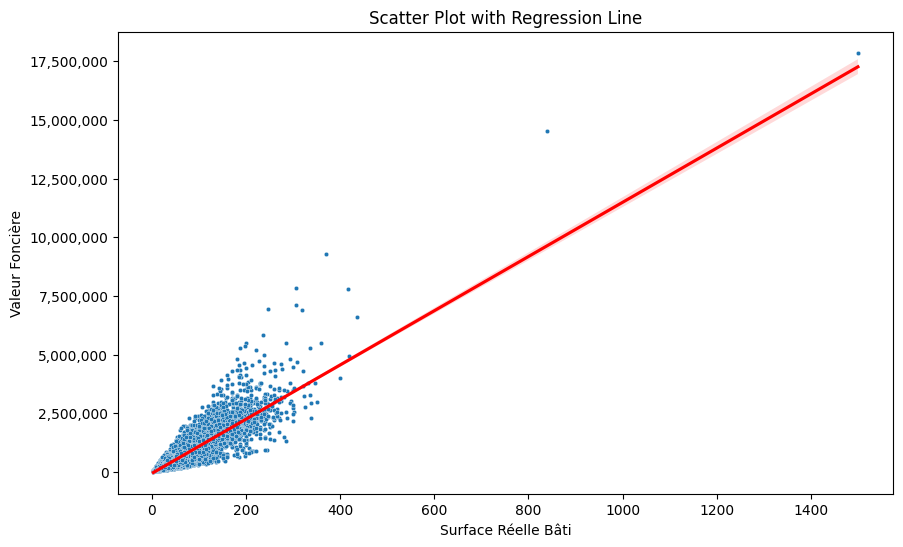

In [ ]:
X = df_flats_copy.drop(columns=['valeur_fonciere'])
y = df_flats_copy['valeur_fonciere']

# scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['surface_reelle_bati'], y=y, s=10)
sns.regplot(x=X['surface_reelle_bati'], y=y, scatter=False, color="red")

plt.xlabel("Surface Réelle Bâti")
plt.ylabel("Valeur Foncière")
plt.title("Scatter Plot with Regression Line")

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

> 19. **Compétence C3.7** Expliquer et vulgariser le fonctionnement interne de l'algorithme, pour qu'il puisse faire ses prédictions.
Expliquer aussi quelles sont la, ou le(s) variable(s) utilisé par l'algorithme pour faire ses prédictions de prix.

La régression linéaire est comme une calculatrice intelligente. Elle regarde toutes tes données et essaie de trouver la meilleure formule pour prédire le prix en fonction de la taille, du nombre de pièces, et de l'arrondissement. Tu essaies de trouver une sorte de formule qui relie la taille, le nombre de pièces et l'arrondissement au prix de vente.

> 20. **Compétence C3.1** Afficher la matrice de corrélation pour `df_flats`. Quelles sont les deux variables qui ont la corrélation la plus élevée avec `y`, c'est à dire "valeur foncière" ?

**Réponse :**


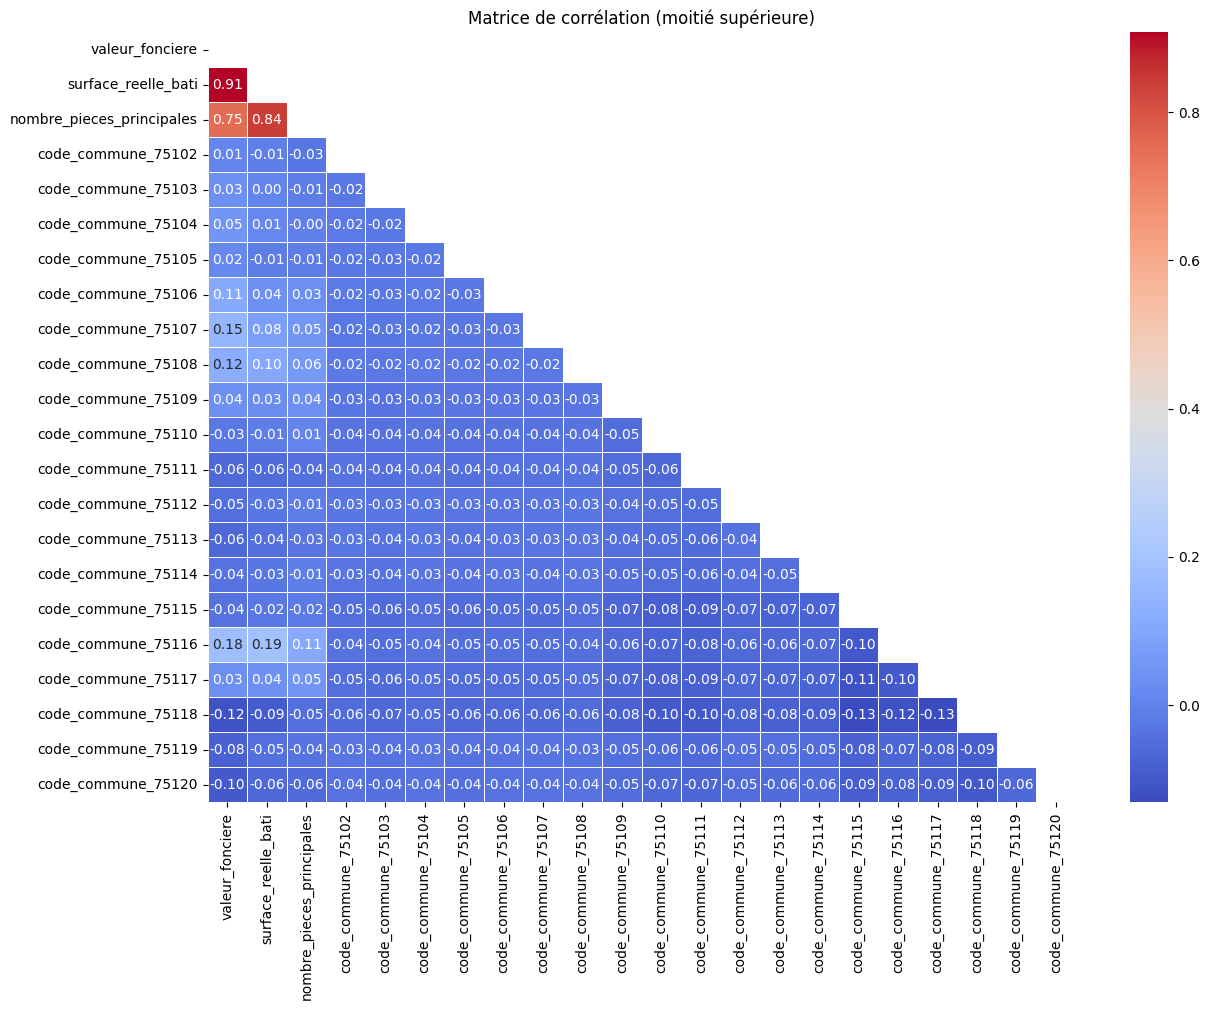

Les deux variables ayant la corrélation la plus élevée avec 'valeur foncière' sont :
surface_reelle_bati          0.908142
nombre_pieces_principales    0.750153
Name: valeur_fonciere, dtype: float64


In [ ]:
corr_matrix = df_flats_copy.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matrice de corrélation (moitié supérieure)')
plt.show()

correlations = corr_matrix['valeur_fonciere'].drop('valeur_fonciere')
top_correlations = correlations.abs().sort_values(ascending=False).head(2)

print("Les deux variables ayant la corrélation la plus élevée avec 'valeur foncière' sont :")
print(top_correlations)

### Partie Machine Learning - Classification _(1 heure 45 minutes)_



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_ml_idf = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/transactions_idf_no_paris.csv")
df_ml_idf.head(1)

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,type_local
0,282000.0,101,4,maison


> 21. Créer `X` et `y` en vue d'entraîner un modèle capable de prédire si un logement est une maison ou un appartement.
`X` est composé des `valeur_fonciere`, `surface_reelle_bati` et`nombre_pieces_principales`.
`y` est la variable `type_local`.

In [ ]:
X = df_ml_idf[['valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales']]
y = df_ml_idf['type_local']

> 22. Séparer les données en jeu d'entraînement et jeu de test, avec random_state = 0

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

> 23. Importer le modèle `DecisionTreeClassifier` ou `KNeighborsClassifier` de la librairie sklearn.

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(random_state=0)


> 24. **Compétence C3.4** Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé pour évaluer le score du modèle.

In [ ]:
decision_tree_classifier.fit(X_train, y_train)

y_pred_dt = decision_tree_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy_dt}")
print(f"Classification Report:\n{report_dt}")

Accuracy: 0.7838077896700271
Classification Report:
              precision    recall  f1-score   support

 appartement       0.75      0.79      0.77     10177
      maison       0.82      0.78      0.80     12340

    accuracy                           0.78     22517
   macro avg       0.78      0.78      0.78     22517
weighted avg       0.79      0.78      0.78     22517



J'utilise Acuracy pour évaluer mon modèle car elle est simple et relativement intuitive. Il faut quand même croiiser les infos avec d'autres métriques comme recall et precision.

> 25. **Compétence C3.6** On exploite ici des données pour le jeu d'entraînement, et des données pour le jeu de test. Quelles sont les limites de cette méthode ?

Cette méthode dépend de comment sont faits les deux jeux, avec quel pourcentage, si le dataset est petit c'est moins fiable, il faut faire attention à l'overfitting et l'underfitting. On peut utiliser la cross validation pour avoir une meilleure évaluation.

> 26. Afficher la matrice de confusion (`confusion matrix`) et la commenter. Expliquer les métriques `precision` et `recall`.

La précision est le métrique qui calcule le taux de preédiction positives correctes.le Recall est la proportion de positifs correctement trouvés par le modèle.


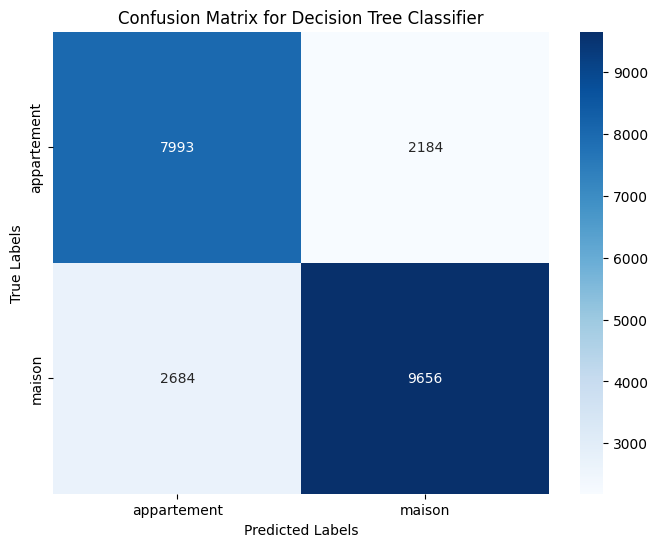

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# matrice d econfusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

Fin de la journée...

![](https://media.giphy.com/media/VekcnHOwOI5So/giphy-downsized.gif)

# Étude de marché - Vin _(8 heures)_

Le client, le Domaine des Croix, cherche à se lancer sur le marché américain . Il souhaite donc **définir le prix** de ses bouteilles de vin **pour être compétitif sur le marché américain**. Il a récupéré un jeu de données de 130k bouteilles de vin, avec les cépages, les pays et région de production, les millésimes (c'est-à-dire les années de production), ainsi que des notes ("points") et descriptifs d'oenologues (les spécialistes du vin), et le prix moyen en dollars de toutes ces bouteilles sur le marché américain.

**L'objectif sera de faire une présentation de l'analyse du marché, et du prix que vous conseillez de fixer pour les vins du client.** Le client n'est pas data analyst, mais souhaiterait comprendre la démarche. Il faudra donc s'attacher à expliquer comment les prix ont été fixés, sans rentrer dans un trop grand niveau technique, autrement dit : vulgariser.




## Jeux de données
- Dataset des 130k vins : https://github.com/WildCodeSchool/wilddata/raw/main/wine.zip
- Dataset de la bouteille de vin que le client aimerait proposer sur le marché américain : https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/domaine_des_croix.csv


## Livrables attendus
**Compétence C4.6, Compétence C4.1** Le client souhaite une présentation (et non pas du code)
La présentation contiendra a minima ces éléments :
- Rappel du contexte et de la problématique
- Analyse exploratoire des données
- Méthodologie, outils et langages utilisés  **Compétence C2.2**
- Présentation de la partie technique et du code créé, si code il y a, pour cette analyse
- Votre tableau de bord contient des graphiques. **Compétence C4.2**
- Votre tableau de bord contient au moins une visualisation de données interactive. **Compétence C4.3**
- Votre tableau de bord contient au moins une carte représentant des informations géographiques. **Compétence C4.4**
- Votre tableau de bord contient au moins un tableau croisé. **Compétence C4.5**
- L'ensemble des graphiques et visuels doivent être lisible par tous (prise en compte des personne en situation de handicap visuel). **Compétence C4.7**
- Réponse à la question métier : proposition de prix ou de fourchette de prix au client pour être correctement positionné face à la concurrence sur le marché américain

Effectuez tout d'abord la trame ci-dessous. Puis, si vous avez des bonnes idées à proposer au client, elles sont évidemment les bienvenues.



## Préparation des données et exploration des données

## Analyse du marché
Le Domaine des Croix souhaiterait une analyse descriptive du marché du vin. Vous allez donc réaliser un ensemble de dataviz, avec l'outil de votre choix (Seaborn, Plotly, Excel, PowerBI, Tableau, etc...). Vous pouvez par exemple intégrer dans votre tableau de bord:
- la répartition du nombre de vins par pays
- les pays qui ont les meilleures notes
- les moyennes de notes par cépage
- la répartition par décile
- etc...



## Analyse comparative

L'objectif ici sera de comparer chacun des vins du client par rapport à ses concurrents sur le marché. Par exemple, comparer les tarifs pratiqués pour les vins français, puis de plus en plus précisément, les vins de Bourgogne puisque notre client est en Bourgogne, puis les Pinot Noir bourguignons de la même année.
N'hésitez pas à être original dans la présentation et les dataviz utilisées.

## Proposition de valeur

Avec le tableau de bord que vous lui avez fourni, le client a une idée précise de ses concurrents. Faites lui une proposition de prix en fonction de sa volonté de positionnement (par exemple : "si vous souhaitez vous positionner sur le haut de gamme, les 25% les plus chers de vos concurrents sont à ce tarif, nous vous conseillons donc de vous aligner sur ce prix").

## Qualité esthétique du tableau de bord

Essayez de garder un oeil critique et visuel sur votre tableau de bord. La forme compte autant que le fond pour le client qui n'est pas data analyst. Pensez donc à "vendre" votre analyse. Par exemple, avec des couleurs s'inspirant du milieu vinicole, des dataviz originales, etc...

## C'est à vous de jouer:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
link = "https://github.com/WildCodeSchool/wilddata/raw/main/wine.zip"
df = pd.read_csv(link)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129957 entries, 0 to 129956
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129894 non-null  object 
 1   description            129957 non-null  object 
 2   designation            92497 non-null   object 
 3   points                 129957 non-null  int64  
 4   price                  120964 non-null  float64
 5   province               129894 non-null  object 
 6   region_1               108710 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103713 non-null  object 
 9   taster_twitter_handle  98744 non-null   object 
 10  title                  129957 non-null  object 
 11  variety                129956 non-null  object 
 12  winery                 129957 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [ ]:
url_domaine_des_croix = "https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/domaine_des_croix.csv"
domaine_des_croix_df = pd.read_csv(url_domaine_des_croix)

domaine_des_croix_df.columns = df.columns
df = pd.concat([df, domaine_des_croix_df], ignore_index=True)

df.tail(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129948,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,37,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Cusumano 2018 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano
129949,Israel,"A bouquet of black cherry, tart cranberry and ...",Oak Aged,90,27,Galilee,NaN,NaN,Mike DeSimone,@worldwineguys,Dalton 2018 Oak Aged Cabernet Sauvignon (Galilee),Cabernet Sauvignon,Dalton
129950,France,"Initially quite muted, this wine slowly develo...",Domaine Saint-Rémy Herrenweg,90,NaN,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Ehrhart 2019 Domaine Saint-Rémy Herren...,Gewürztraminer,Domaine Ehrhart
129951,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,29,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Rieflé-Landmann 2019 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann
129952,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,29,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2019 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129953,US,Citation is given as much as a decade of bottl...,NaN,90,92,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2010 Pinot Noir (Oregon),Pinot Noir,Citation
129954,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2019 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129955,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,33,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2018 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129956,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,28,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2018 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit
129957,France,Firm and solid with great swathes of black fru...,NaN,94,NaN,Burgundy,Corton Grèves,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Corton Grèves,Pinot Noir,Domaine des Croix


In [ ]:
df_wine = df.copy()

In [ ]:
df_wine.describe()

,points,price
count,129958,120964
mean,88,36
std,3,33
min,80,2
25%,86,21
50%,88,29
75%,91,42
max,100,1902


In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129958 entries, 0 to 129957
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129895 non-null  object 
 1   description            129958 non-null  object 
 2   designation            92497 non-null   object 
 3   points                 129958 non-null  int64  
 4   price                  120964 non-null  float64
 5   province               129895 non-null  object 
 6   region_1               108711 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103714 non-null  object 
 9   taster_twitter_handle  98745 non-null   object 
 10  title                  129958 non-null  object 
 11  variety                129957 non-null  object 
 12  winery                 129958 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [ ]:
null_values = df_wine.isnull().sum()
print("Valeurs nulles par colonne :\n", null_values)

Valeurs nulles par colonne :
 country                     63
description                  0
designation              37461
points                       0
price                     8994
province                    63
region_1                 21247
region_2                 79447
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


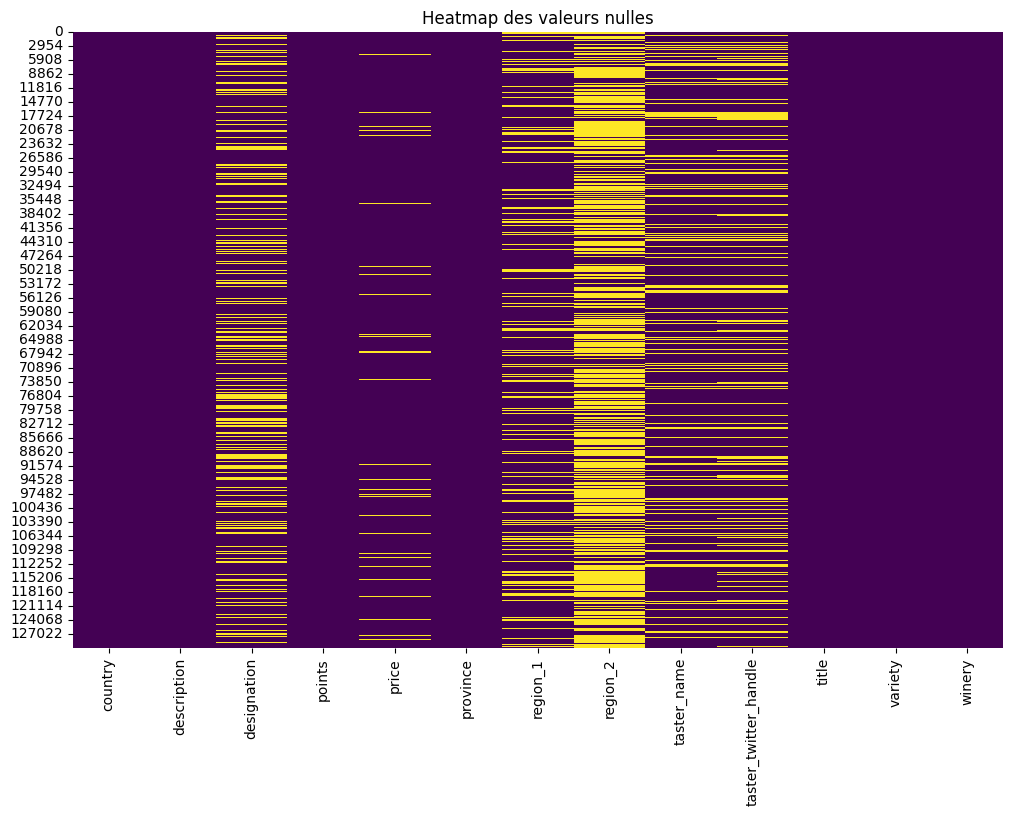

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_wine.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap des valeurs nulles')
plt.show()

In [ ]:
df_wine = df_wine.drop(columns=['region_2', 'taster_name', 'taster_twitter_handle'])

In [ ]:
rows_without_country = df_wine[df_wine['country'].isnull()]
print("Lignes sans pays :\n", rows_without_country)

wineries_without_country = rows_without_country['winery'].unique()

known_countries = df_wine[df_wine['winery'].isin(wineries_without_country) & df_wine['country'].notnull()]

winery_country_mapping = known_countries[['winery', 'country']].drop_duplicates()

df_wine_filled = df_wine.copy()
for winery in winery_country_mapping['winery']:
    country = winery_country_mapping[winery_country_mapping['winery'] == winery]['country'].values[0]
    df_wine_filled.loc[(df_wine_filled['winery'] == winery) & (df_wine_filled['country'].isnull()), 'country'] = country

filled_rows = df_wine_filled[df_wine_filled['winery'].isin(wineries_without_country) & df_wine_filled['country'].notnull()]

print("Vignobles avec pays remplis :\n", filled_rows[['winery', 'country']].drop_duplicates())

Lignes sans pays :
        country                                        description  \
913        NaN  Amber in color, this wine has aromas of peach ...   
3131       NaN  Soft, fruity and juicy, this is a pleasant, si...   
4243       NaN  Violet-red in color, this semisweet wine has a...   
9509       NaN  This mouthwatering blend starts with a nose of...   
9750       NaN  This orange-style wine has a cloudy yellow-gol...   
...        ...                                                ...   
124162     NaN  This Swiss red blend is composed of four varie...   
129393     NaN  Dry spicy aromas of dusty plum and tomato add ...   
129394     NaN  El Capricho is one of Uruguay's more consisten...   
129576     NaN  A blend of 60% Syrah, 30% Cabernet Sauvignon a...   
129886     NaN  This wine offers a delightful bouquet of black...   

                           designation  points  price province region_1  \
913                     Asureti Valley      87     23      NaN      NaN   
3

In [ ]:
null_values = df_wine_filled.isnull().sum()
print("Valeurs nulles par colonne :\n", null_values)

Valeurs nulles par colonne :
 country           31
description        0
designation    37461
points             0
price           8994
province          63
region_1       21247
title              0
variety            1
winery             0
dtype: int64


In [ ]:
vignobles = {
    'Ross-idi': 'Bulgaria',
    'Orbelus': 'Bulgaria',
    'Tsililis': 'Greece',
    'Somlói Vándor': 'Hungary',
    'El Capricho': 'Spain',
    'Kakhetia Traditional Winemaking': 'Georgia',
    'St. Donat': 'Croatia',
    'Les Frères Dutruy': 'Switzerland',
    'Büyülübağ': 'Turkey',
    'Stone Castle': 'Moldova',
    'Lismore': 'South Africa',
    'Amiran Vepkhvadze': 'Georgia'
}
# fonction pour remplir les valeurs manquantes dans la colonne 'country'
def fill_country(row):
    winery = row['winery']
    if pd.isnull(row['country']):
        if winery in vignobles:
            return vignobles[winery]
    return row['country']


df_wine_filled['country'] = df_wine_filled.apply(fill_country, axis=1)

null_values = df_wine_filled.isnull().sum()
print("Valeurs nulles par colonne :\n", null_values)

Valeurs nulles par colonne :
 country            0
description        0
designation    37461
points             0
price           8994
province          63
region_1       21247
title              0
variety            1
winery             0
dtype: int64


In [ ]:
df_wine_filled = df_wine_filled.drop_duplicates()

In [ ]:
null_values = df_wine_filled.isnull().sum()
print("Valeurs nulles par colonne :\n", null_values)

Valeurs nulles par colonne :
 country            0
description        0
designation    34542
points             0
price           8393
province          59
region_1       19560
title              0
variety            1
winery             0
dtype: int64


In [ ]:
df_wine_filled

,country,description,designation,points,price,province,region_1,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Nicosia 2019 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,20,Douro,NaN,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,18,Oregon,Willamette Valley,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,18,Michigan,Lake Michigan Shore,St. Julian 2019 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2016, this...",Vintner's Reserve Wild Child Block,87,44,Oregon,Willamette Valley,Sweet Cheeks 2018 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...
129953,US,Citation is given as much as a decade of bottl...,NaN,90,92,Oregon,Oregon,Citation 2010 Pinot Noir (Oregon),Pinot Noir,Citation
129954,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30,Alsace,Alsace,Domaine Gresser 2019 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129955,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,33,Alsace,Alsace,Domaine Marcel Deiss 2018 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129956,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,28,Alsace,Alsace,Domaine Schoffit 2018 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [ ]:
# Fonction pour extraire le millésime à partir de la colonne title avec comme contrainte 1930 à 2023
def extract_vintage(title):

    match = re.search(r'\b(19\d{2}|20(?:0\d|1[0-9]|2[0-2]))\b', title)
    if match:
        year = int(match.group(0))
        if 1930 <= year <= 2023:
            return year
    return None

df_wine_filled['vintage'] = df_wine_filled['title'].apply(extract_vintage)

pd.options.display.float_format = '{:.0f}'.format

In [ ]:
min_vintage = df_wine_filled['vintage'].min()
max_vintage = df_wine_filled['vintage'].max()

print(f"Minimum de la colonne 'vintage': {min_vintage:.0f}")
print(f"Maximum de la colonne 'vintage': {max_vintage:.0f}")

Minimum de la colonne 'vintage': 1931
Maximum de la colonne 'vintage': 2022


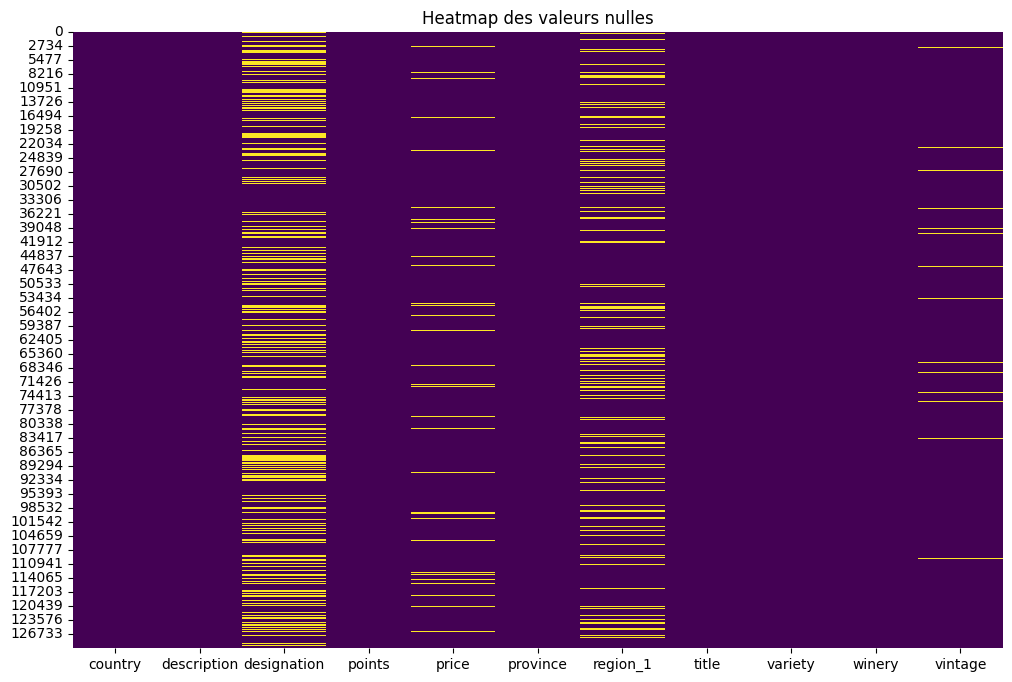

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_wine_filled.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap des valeurs nulles')
plt.show()


In [ ]:
null_count = df_wine_filled['price'].isna().sum()

print("Nombre de valeurs null ou NaN dans la colonne 'price':", null_count)

Nombre de valeurs null ou NaN dans la colonne 'price': 8393


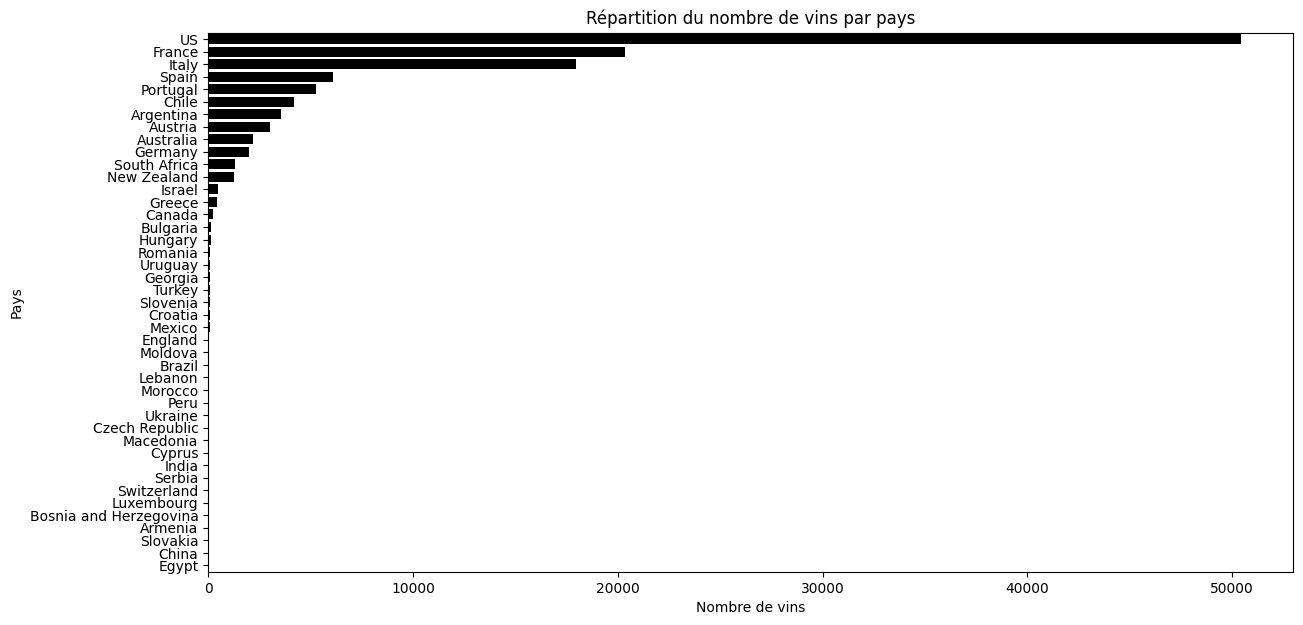

In [ ]:
# Répartition du nombre de vins par pays
plt.figure(figsize=(14, 7))
sns.countplot(y='country', data=df_wine_filled, order=df_wine_filled['country'].value_counts().index, color = 'black')
plt.title('Répartition du nombre de vins par pays')
plt.xlabel('Nombre de vins')
plt.ylabel('Pays')
plt.show()

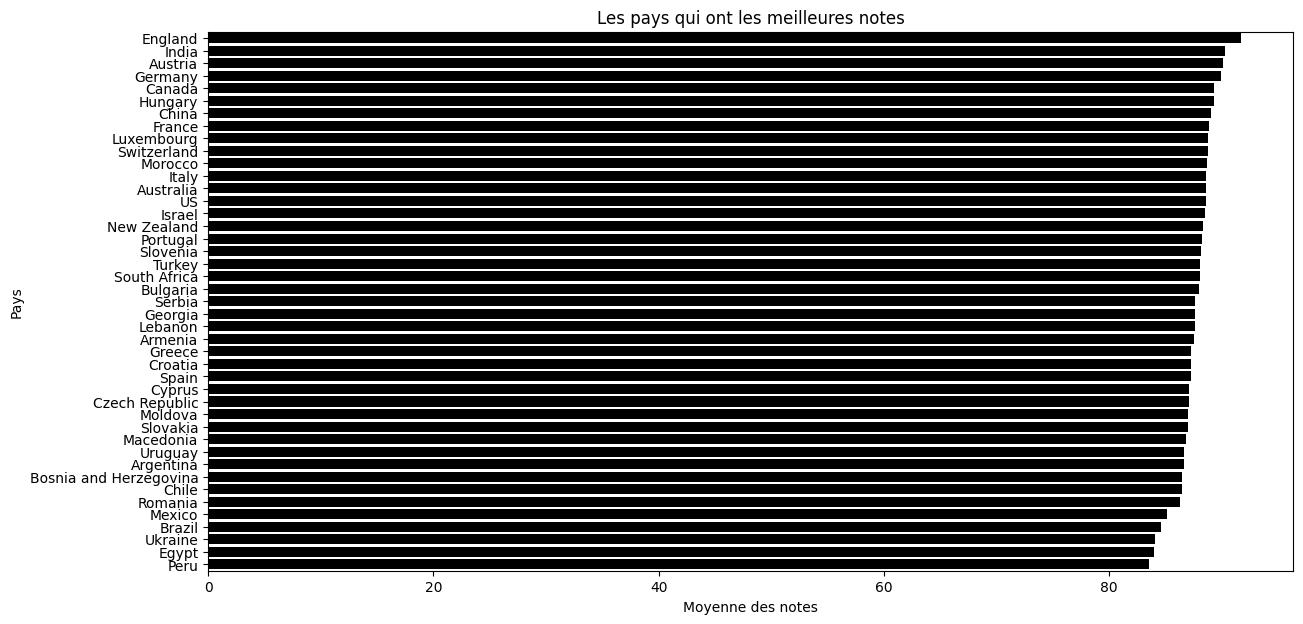

In [ ]:
#pays qui ont les meilleures notes
plt.figure(figsize=(14, 7))
avg_points_by_country = df_wine_filled.groupby('country')['points'].mean().sort_values(ascending=False)
sns.barplot(x=avg_points_by_country.values, y=avg_points_by_country.index, color='black')
plt.title('Les pays qui ont les meilleures notes')
plt.xlabel('Moyenne des notes')
plt.ylabel('Pays')
plt.show()


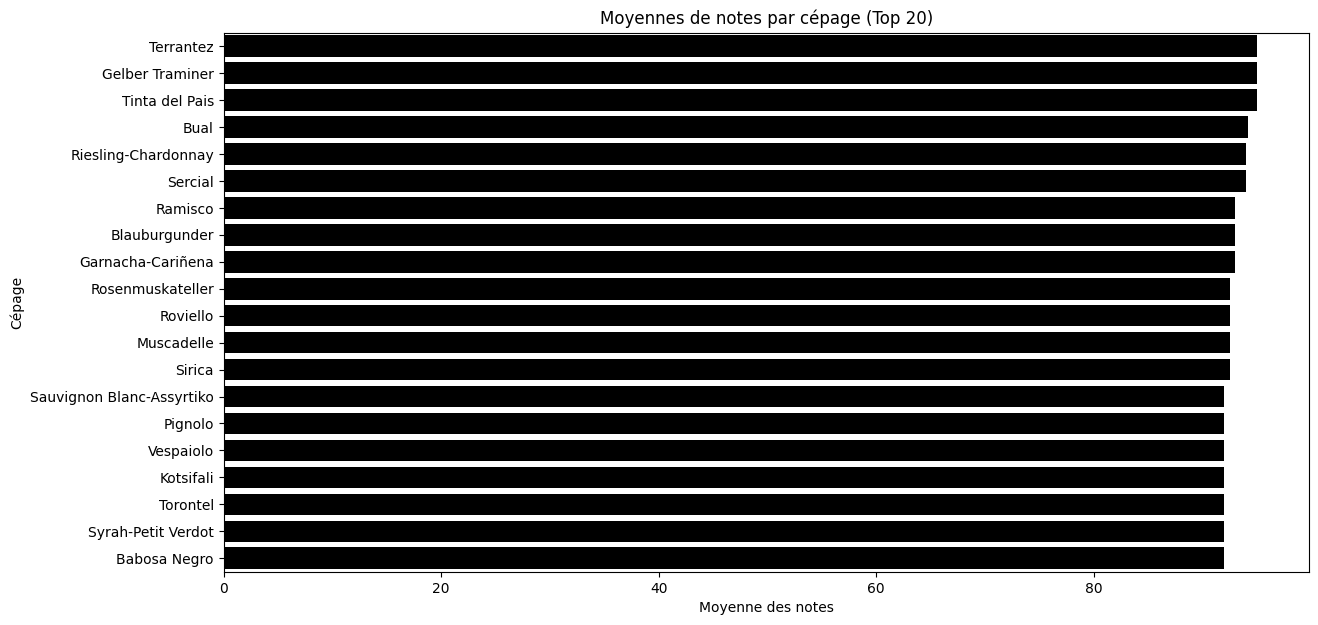

In [ ]:
plt.figure(figsize=(14, 7))
avg_points_by_variety = df_wine_filled.groupby('variety')['points'].mean().sort_values(ascending=False).head(20)
sns.barplot(x=avg_points_by_variety.values, y=avg_points_by_variety.index, color = 'black')
plt.title('Moyennes de notes par cépage (Top 20)')
plt.xlabel('Moyenne des notes')
plt.ylabel('Cépage')
plt.show()

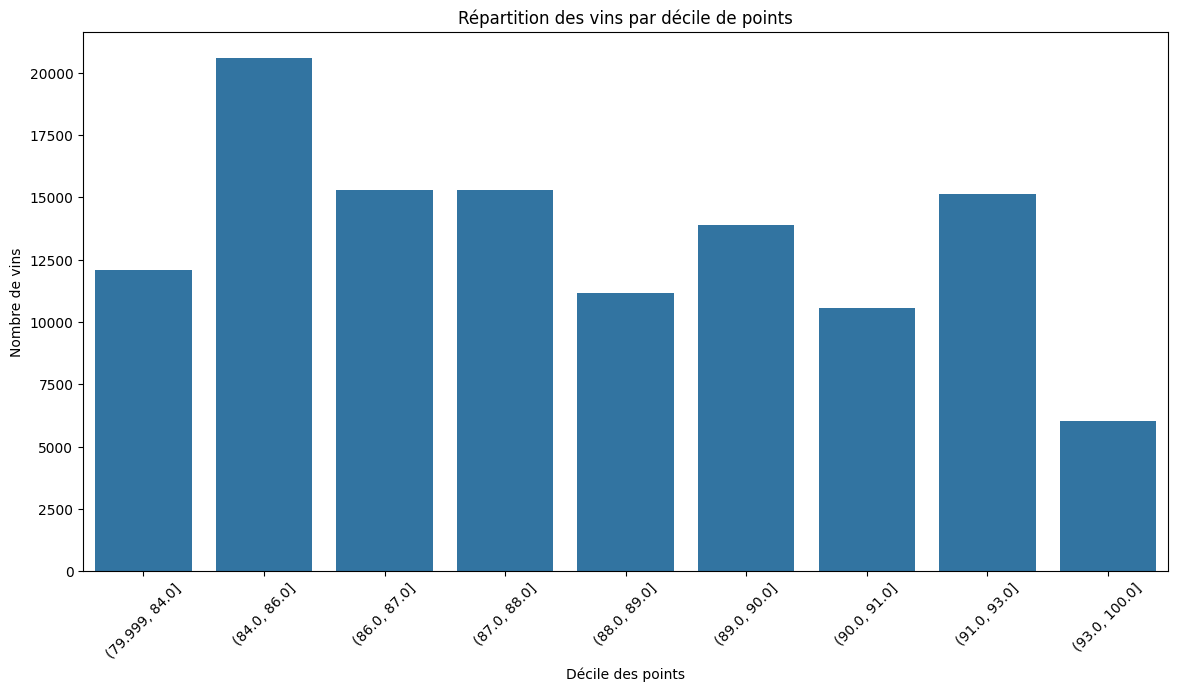

In [ ]:
plt.figure(figsize=(14, 7))
df_wine_filled['points_decile'] = pd.qcut(df_wine_filled['points'], 10, duplicates='drop')
decile_counts = df_wine_filled['points_decile'].value_counts().sort_index()
sns.barplot(x=decile_counts.index.astype(str), y=decile_counts.values)
plt.title('Répartition des vins par décile de points')
plt.xlabel('Décile des points')
plt.ylabel('Nombre de vins')
plt.xticks(rotation=45)
plt.show()

In [ ]:
pinot_noir_df = df[df['variety'] == 'Pinot Noir']

ecart_mondial = pinot_noir_df['points'].max() - pinot_noir_df['points'].min()

pinot_noir_burgundy_df = pinot_noir_df[pinot_noir_df['region_1'] == 'Burgundy']

ecart_burgundy = pinot_noir_burgundy_df['points'].max() - pinot_noir_burgundy_df['points'].min()

print(f"Ecart mondial des notes pour le Pinot Noir : {ecart_mondial}")
print(f"Ecart des notes pour le Pinot Noir en Burgundy : {ecart_burgundy}")

Ecart mondial des notes pour le Pinot Noir : 19
Ecart des notes pour le Pinot Noir en Burgundy : 0


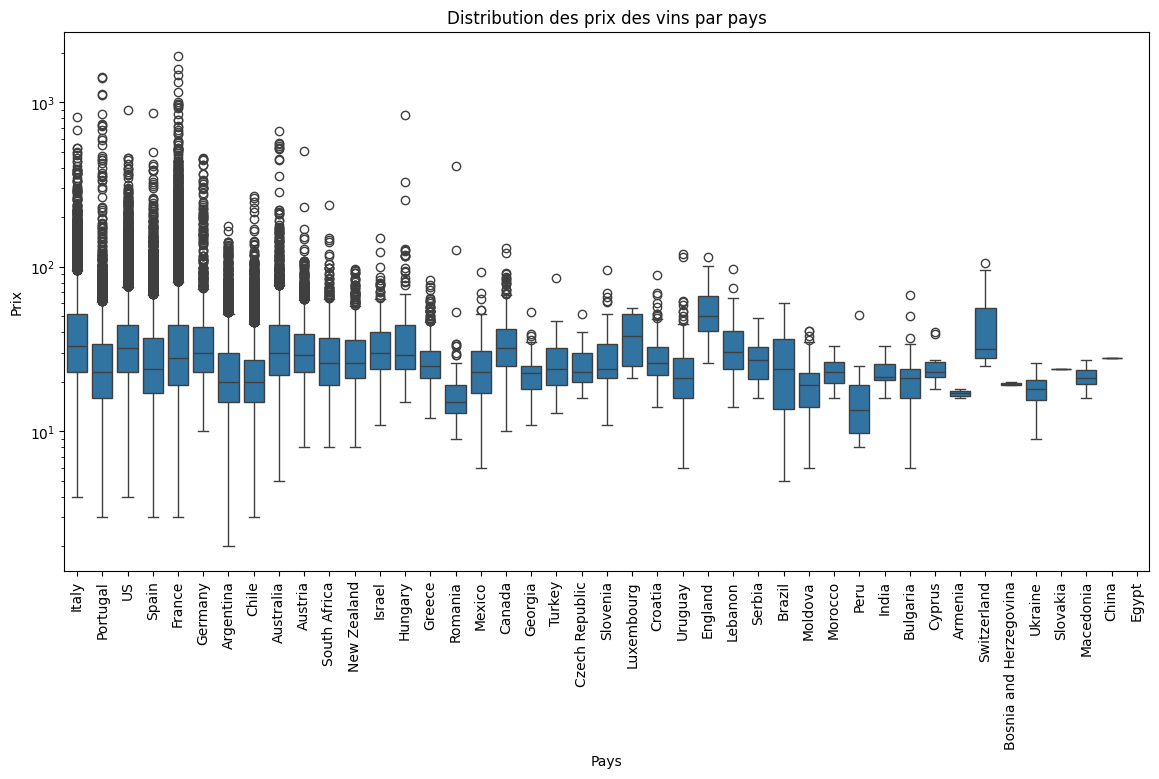

In [ ]:

plt.figure(figsize=(14, 7))
sns.boxplot(x='country', y='price', data=df_wine_filled)
plt.title('Distribution des prix des vins par pays')
plt.xlabel('Pays')
plt.ylabel('Prix')
plt.xticks(rotation=90)
plt.yscale('log')                                                                   # échelle logarithmique pour mieux visualiser la distribution des prix
plt.show()

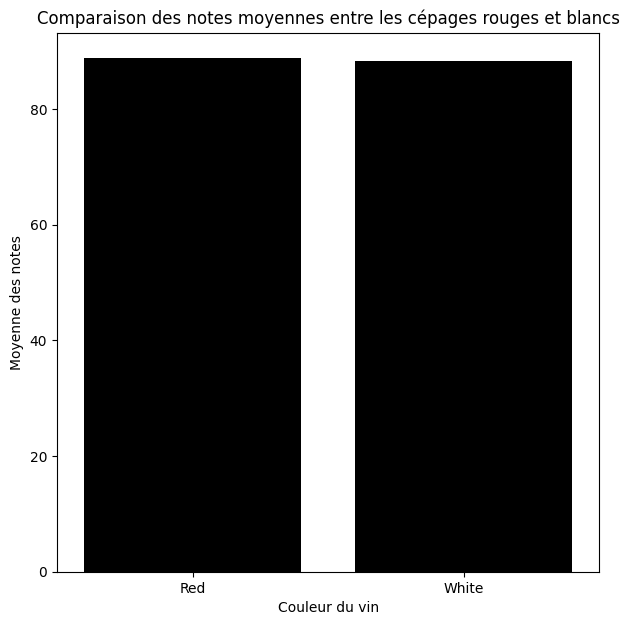

In [ ]:
# comparaison des notes moyennes entre les cépages rouges et blancs
df_wine_filled['color'] = df_wine_filled['variety'].fillna('').apply(
    lambda x: 'Red' if any(keyword in x for keyword in ['Red', 'Pinot Noir', 'Cabernet', 'Merlot']) else 'White'
)
avg_points_by_color = df_wine_filled.groupby('color')['points'].mean()

plt.figure(figsize=(7, 7))
sns.barplot(x=avg_points_by_color.index, y=avg_points_by_color.values, color = 'black')
plt.title('Comparaison des notes moyennes entre les cépages rouges et blancs')
plt.xlabel('Couleur du vin')
plt.ylabel('Moyenne des notes')
plt.show()

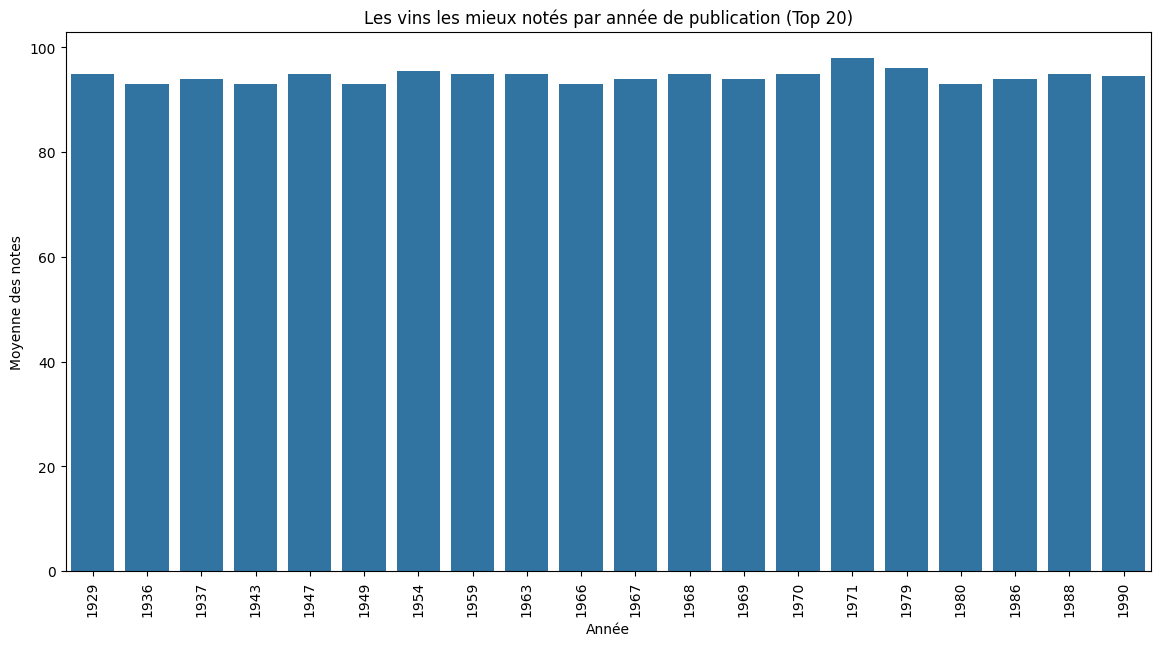

In [ ]:
df_wine_filled['year'] = df_wine_filled['title'].str.extract(r'(\d{4})').astype(float)
top_wines_by_year = df_wine_filled.groupby('year')['points'].mean().dropna().sort_values(ascending=False).head(20)

plt.figure(figsize=(14, 7))
sns.barplot(x=top_wines_by_year.index.astype(int), y=top_wines_by_year.values)
plt.title('Les vins les mieux notés par année de publication (Top 20)')
plt.xlabel('Année')
plt.ylabel('Moyenne des notes')
plt.xticks(rotation=90)
plt.show()

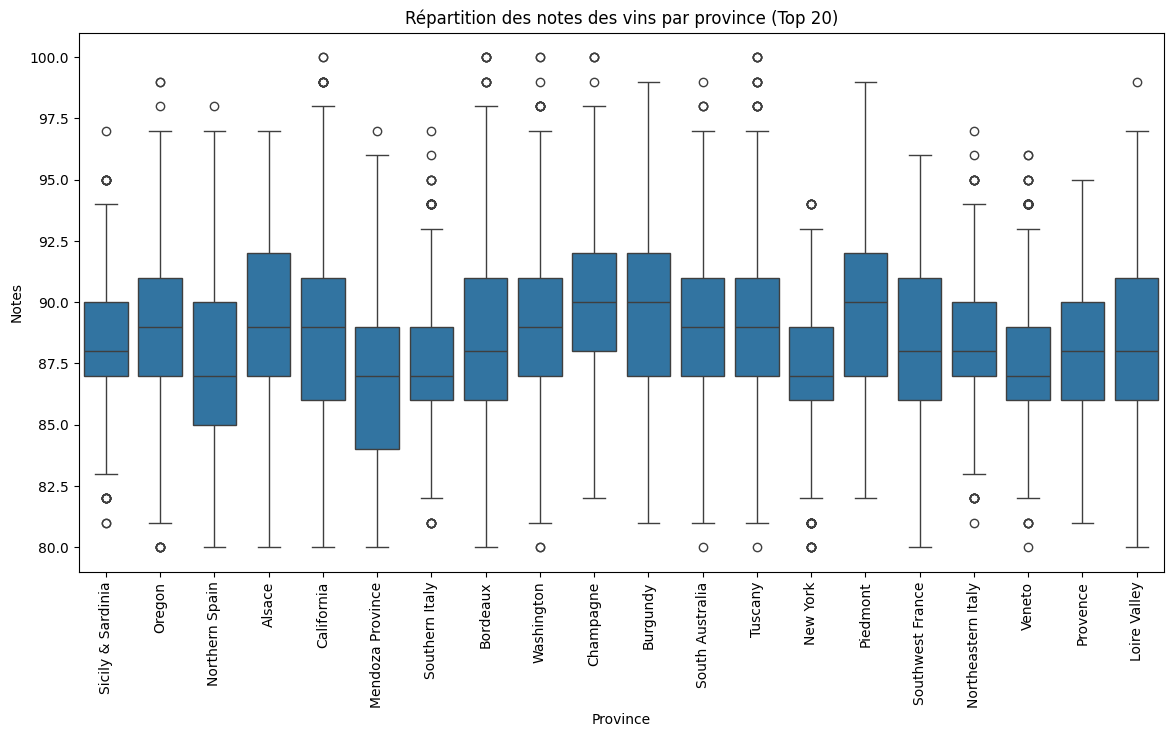

In [ ]:
#notes des vins par province
plt.figure(figsize=(14, 7))
top_provinces = df_wine_filled['province'].value_counts().head(20).index
sns.boxplot(x='province', y='points', data=df_wine_filled[df_wine_filled['province'].isin(top_provinces)])
plt.title('Répartition des notes des vins par province (Top 20)')
plt.xlabel('Province')
plt.ylabel('Notes')
plt.xticks(rotation=90)
plt.show()


       price  points
count   1452    1806
mean      66      90
std       88       3
min        6      80
25%       29      87
50%       46      90
75%       75      92
max     1902      98


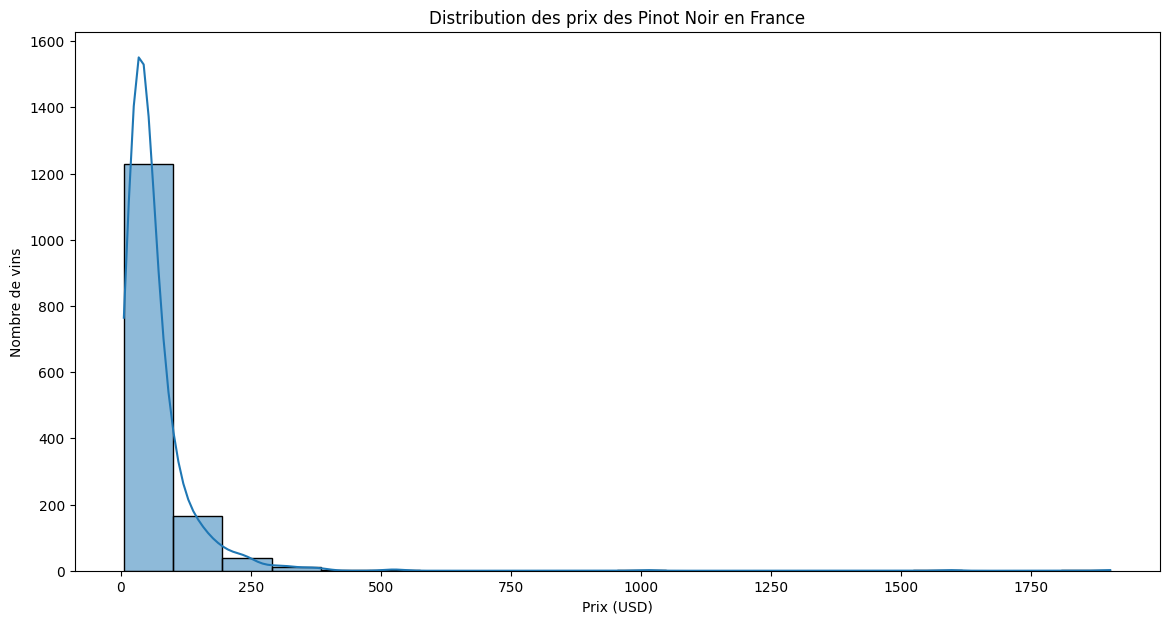

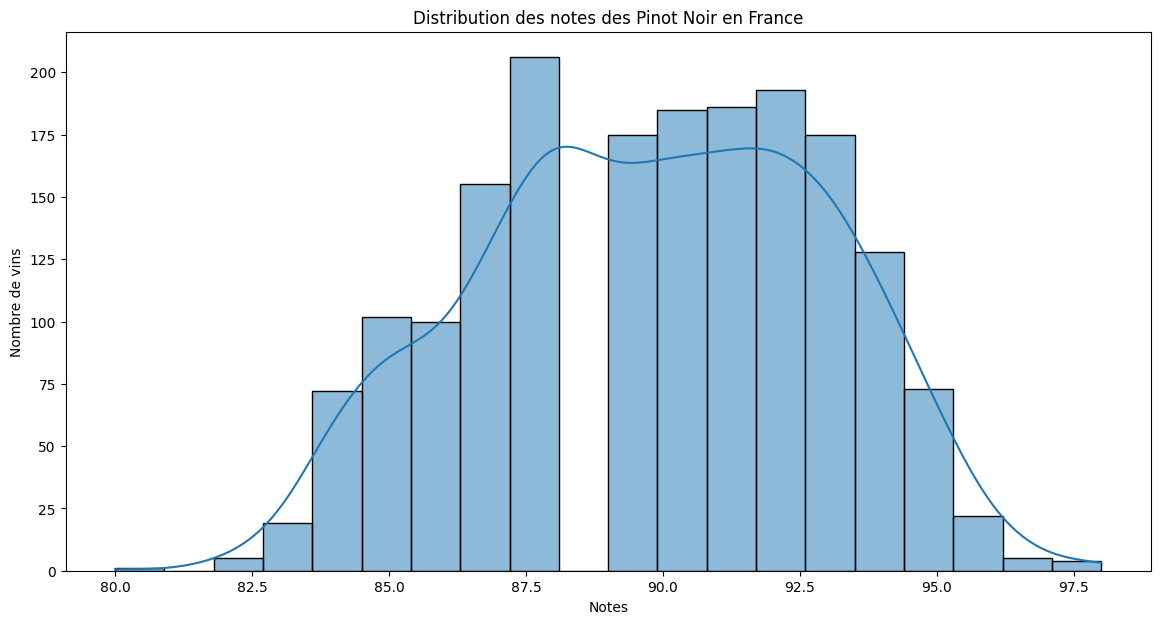

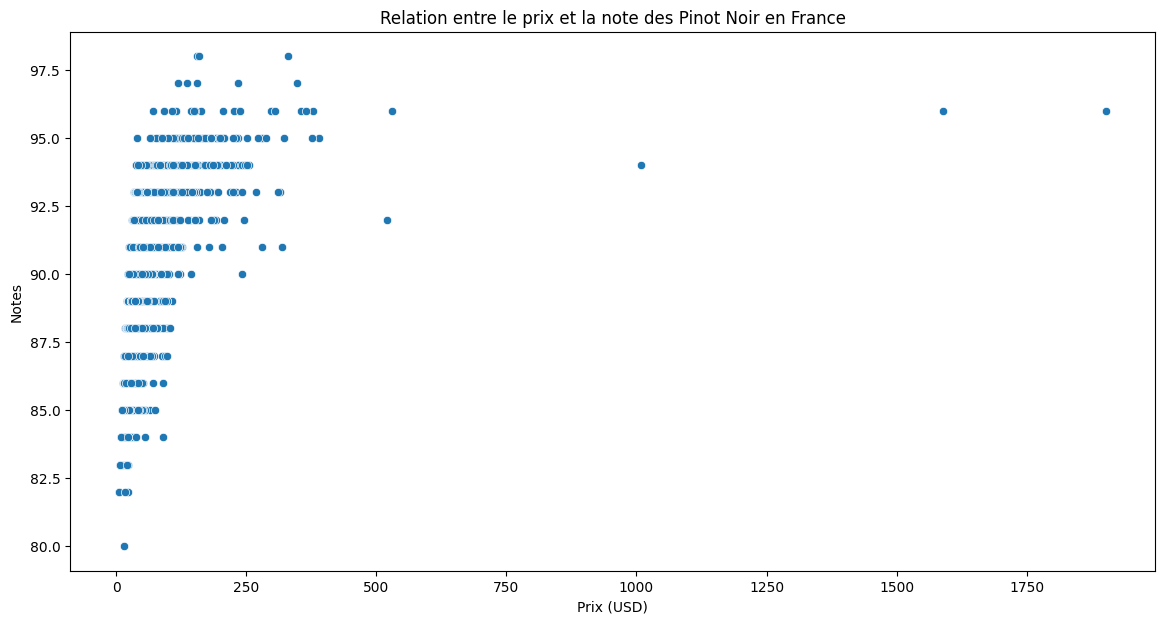

In [ ]:
# Filtrer les données pour ne conserver que les Pinot Noir en France
pinot_noir_france = df_wine_filled[(df_wine_filled['country'] == 'France') & (df_wine_filled['variety'] == 'Pinot Noir')]

print(pinot_noir_france[['title', 'price', 'points']].describe())

plt.figure(figsize=(14, 7))
sns.histplot(pinot_noir_france['price'].dropna(), bins=20, kde=True)
plt.title('Distribution des prix des Pinot Noir en France')
plt.xlabel('Prix (USD)')
plt.ylabel('Nombre de vins')
plt.show()

plt.figure(figsize=(14, 7))
sns.histplot(pinot_noir_france['points'].dropna(), bins=20, kde=True)
plt.title('Distribution des notes des Pinot Noir en France')
plt.xlabel('Notes')
plt.ylabel('Nombre de vins')
plt.show()

plt.figure(figsize=(14, 7))
sns.scatterplot(x='price', y='points', data=pinot_noir_france)
plt.title('Relation entre le prix et la note des Pinot Noir en France')
plt.xlabel('Prix (USD)')
plt.ylabel('Notes')
plt.show()

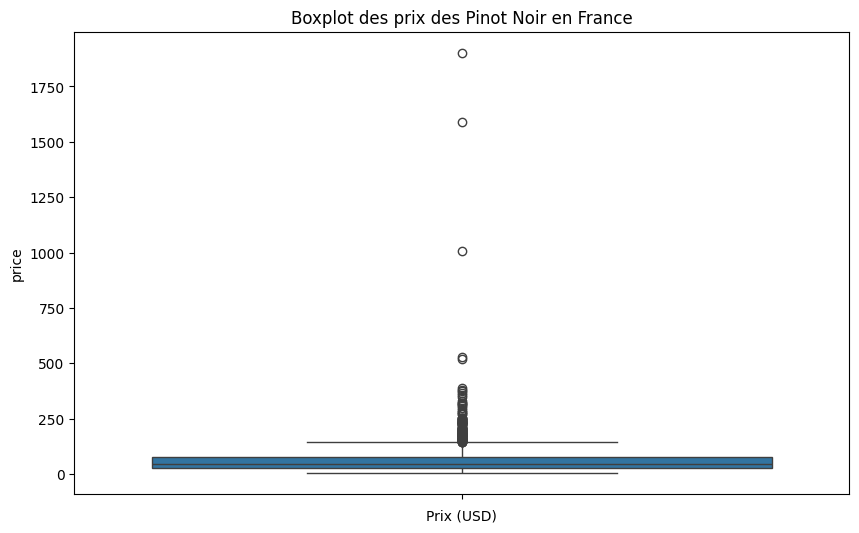

In [ ]:
pinot_noir_france = df_wine_filled[(df_wine_filled['country'] == 'France') & (df_wine_filled['variety'] == 'Pinot Noir')]

plt.figure(figsize=(10, 6))
sns.boxplot(y=pinot_noir_france['price'])
plt.title('Boxplot des prix des Pinot Noir en France')
plt.xlabel('Prix (USD)')
plt.show()

In [ ]:
# ML random forest regressor

df_pinot_noir_france = df_wine_filled[(df_wine_filled['variety'] == 'Pinot Noir') & (df_wine_filled['country'] == 'France')]

if df_pinot_noir_france.empty:
    print("Le DataFrame filtré pour les Pinot Noir français est vide.")
else:

    df_pinot_noir_france = df_pinot_noir_france.dropna(subset=['price', 'vintage', 'variety', 'country', 'province'])

    if df_pinot_noir_france.empty:
        print("Le DataFrame est vide après le nettoyage.")
    else:

        label_encoders = {}
        for column in ['variety', 'country', 'province']:
            le = LabelEncoder()
            df_pinot_noir_france.loc[:, column] = le.fit_transform(df_pinot_noir_france[column])
            label_encoders[column] = le

        X = df_pinot_noir_france[['vintage', 'variety', 'country', 'province', 'points']]
        y = df_pinot_noir_france['price']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"Mean Absolute Error: {mae}")

        new_wine = {
            'title': 'Domaine des Croix 2016 Corton Grèves',
            'variety': 'Pinot Noir',
            'country': 'France',
            'province': 'Burgundy',
            'points': 94,
            'vintage': 2016
        }

        new_wine_encoded = new_wine.copy()
        for column in ['variety', 'country', 'province']:
            if new_wine[column] in label_encoders[column].classes_:
                new_wine_encoded[column] = label_encoders[column].transform([new_wine[column]])[0]
            else:
                new_wine_encoded[column] = -1

        new_wine_df = pd.DataFrame([new_wine_encoded])

        predicted_price = model.predict(new_wine_df[['vintage', 'variety', 'country', 'province', 'points']])
        print(f"Predicted price for {new_wine['title']}: ${predicted_price[0]:.2f}")


Mean Absolute Error: 23.535074844173153
Predicted price for Domaine des Croix 2016 Corton Grèves: $178.38


In [ ]:
df_wine_filled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119976 entries, 0 to 129957
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   country        119976 non-null  object  
 1   description    119976 non-null  object  
 2   designation    85434 non-null   object  
 3   points         119976 non-null  int64   
 4   price          111583 non-null  float64 
 5   province       119917 non-null  object  
 6   region_1       100416 non-null  object  
 7   title          119976 non-null  object  
 8   variety        119975 non-null  object  
 9   winery         119976 non-null  object  
 10  vintage        115648 non-null  float64 
 11  points_decile  119976 non-null  category
 12  color          119976 non-null  object  
 13  year           115707 non-null  float64 
dtypes: category(1), float64(3), int64(1), object(9)
memory usage: 12.9+ MB


In [ ]:
"""
#enregistrer un copie du dataset df_wine_filled dans google drive

from google.colab import drive
drive.mount('/content/drive')

df_wine_filled.to_csv('/content/drive/My Drive/df_wine_filled.csv', index=False)
"""

"\n#enregistrer un copie du dataset df_wine_filled dans google drive\n\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\ndf_wine_filled.to_csv('/content/drive/My Drive/df_wine_filled.csv', index=False)\n"